# open3d tutorial 

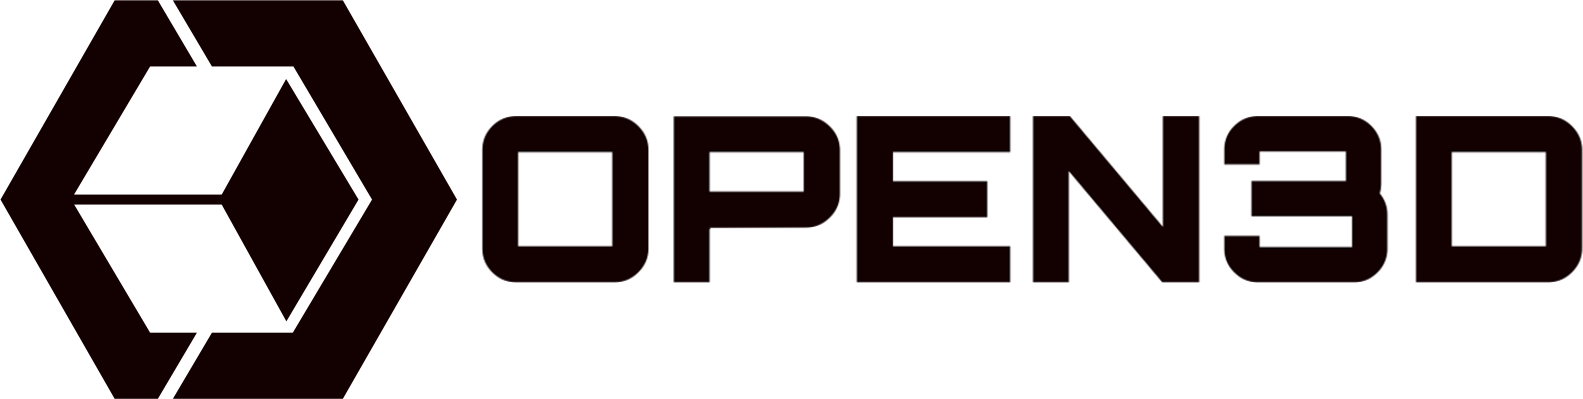

Open3D is an open-source library that supports rapid development of software that deals with 3D data

It was introduced by Qian-Yi Zhou, Jaesik Park and Vladlen Koltun – researchers at Intel Labs (research paper). 


http://www.open3d.org/wordpress/wp-content/paper.pdf


In [1]:
import open3d as o3d

In [2]:
import wget
url = 'https://raw.githubusercontent.com/PointCloudLibrary/pcl/master/test/bunny.pcd'

filename = wget.download(url)

pcd = o3d.io.read_point_cloud("bunny.pcd")
print(pcd)

100% [..............................................................................] 10878 / 10878PointCloud with 397 points.


In [3]:
#The code below writes a point cloud.

o3d.io.write_point_cloud("copy_of_bunny.pcd", pcd)

True

In [4]:
# The code below reads and writes a mesh.
print("Testing IO for meshes ...")

#Function to read TriangleMesh from file
mesh = o3d.io.read_triangle_mesh("xyzrgb_dragon.ply")
print(mesh)



Testing IO for meshes ...
TriangleMesh with 3609600 points and 7219045 triangles.


# Lets work on bunny dataset

In [5]:
import open3d as o3d
import numpy as np
import PIL.Image
import IPython.display
import os
import urllib
import tarfile
import gzip
import zipfile
import shutil

#Download the point cloud using below command
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/bunny.tar.gz'
filename = wget.download(url)

100% [..........................................................................] 4894286 / 4894286

In [6]:
bunny_path = "bunny"
with tarfile.open(bunny_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(bunny_path))

In [7]:
bunny_path = "./bunny/reconstruction/bun_zipper.ply"
mesh = o3d.io.read_triangle_mesh(bunny_path)
mesh.compute_vertex_normals()

TriangleMesh with 35947 points and 69451 triangles.

In [8]:
mesh.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh])

pcd = mesh.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd])

# Download the Happy Buddha dataset
### Source: Stanford University Computer Graphics Laboratory

In [9]:
#Download the Happy Buddha dataset
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/happy/happy_recon.tar.gz'
filename = wget.download(url)

100% [........................................................................] 14456495 / 14456495

In [10]:
budha_path = "happy_recon"
with tarfile.open(budha_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(budha_path))
        
budha_path = "./happy_recon/happy_vrip.ply"
mesh_budha = o3d.io.read_triangle_mesh(budha_path)
mesh_budha.compute_vertex_normals()

TriangleMesh with 543652 points and 1087716 triangles.

In [11]:
mesh_budha.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_budha])

pcd_budha = mesh_budha.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd_budha])

# Dragon Dataset
### Source: Stanford University Computer Graphics Laboratory

In [12]:
import wget
url = 'http://graphics.stanford.edu/pub/3Dscanrep/dragon/dragon_recon.tar.gz'
filename = wget.download(url)

100% [........................................................................] 11197764 / 11197764

In [13]:
dragon_path = "dragon_recon"
with tarfile.open(dragon_path + ".tar.gz") as tar:
            tar.extractall(path=os.path.dirname(dragon_path))
        
dragon_path = "./dragon_recon/dragon_vrip.ply"
mesh_dragon = o3d.io.read_triangle_mesh(dragon_path)
mesh_dragon.compute_vertex_normals()

TriangleMesh with 437645 points and 871414 triangles.

In [14]:
mesh_dragon.compute_vertex_normals()
o3d.visualization.draw_geometries([mesh_dragon])

pcd_dragon = mesh_dragon.sample_points_uniformly(number_of_points=500)
o3d.visualization.draw_geometries([pcd_dragon])

# Voxel downsampling

    1- It is a preprocessing step for point cloud processing tasks.
    2- It takes the point clouds and downsample. 
    3- Points which are in 1 voxels are averaged and we get 1 point after averaging.
    
### Why downsampling?
It makes the data of a more manageable size

Reduces the dimensionality of the data thus enabling in faster processing of the data (image)

Reducing the storage size of the data


In [15]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd_dragon.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)

Downsample the point cloud with a voxel of 0.05


In [16]:
# Another example of Voxel downsampling

In [16]:

import numpy as np
print("Load a ply point cloud, print it, and render it")

#read_point_cloud reads a point cloud from a file. It tries to decode the file based on the extension name.
pcd = o3d.io.read_point_cloud("xyzrgb_dragon.ply")
print(pcd)
print(np.asarray(pcd.points))

#draw_geometries visualizes the point cloud. 
o3d.visualization.draw_geometries([pcd],width=1920, height=1080, left=50, top=50)

Load a ply point cloud, print it, and render it
PointCloud with 3609600 points.
[[-20.48562813 -12.71252346   1.73863351]
 [-20.39302254 -12.74355793   1.7450844 ]
 [-20.43228722 -12.62895012   1.81170237]
 ...
 [ -4.45000076 -61.77999878   0.        ]
 [ -4.45000076 -57.58999634   0.        ]
 [ -9.98999977 -62.75         0.        ]]


# Voxel downsampling

In [17]:
print("Downsample the point cloud with a voxel of 0.05")
downpcd = pcd.voxel_down_sample(voxel_size=0.05)
o3d.visualization.draw_geometries([downpcd],width=1920, height=1080, left=50, top=50)

Downsample the point cloud with a voxel of 0.05
